In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("rv.csv")

In [3]:
pattern = r"^b(?P<book>\d{2})_h(?P<hymn>\d{3})_(?P<stanza>\d{2})_zur_(?P<verse>\w)_(?P<word>\w{2})$"
df[['book', 'hymn', 'stanza', 'verse', 'word']] = df['id'].str.extract(pattern, expand=True)

df['book'] = df['book'].astype(int)
df['hymn'] = df['hymn'].astype(int)  
df['stanza'] = df['stanza'].astype(int)
df['word'] = df['word'].astype(int)

In [4]:
df = df.set_index("id")

In [5]:
df["morphosyntax"] = df["morphosyntax"].apply(
    lambda x: 
    dict(
        tuple(item.split('=')) 
        for item in x.split('|')
    ) 
    if type(x) is str 
    else dict()
)

In [6]:
df

,surface,lemma,lemmaId,grammar,morphosyntax,book,hymn,stanza,verse,word
id,,,,,,,,,,
b01_h001_01_zur_a_01,agním,agní-,#lemma_agni_79,nominal stem,"{'case': 'ACC', 'gender': 'M', 'number': 'SG'}",1,1,1,a,1
b01_h001_01_zur_a_02,īḷe,√īḍ- ~ √īḷ-,#lemma_Iq_1824,root,"{'number': 'SG', 'person': '1', 'mood': 'IND',...",1,1,1,a,2
b01_h001_01_zur_a_03,puróhitam,puróhita-,#lemma_purohita_5659,nominal stem,"{'case': 'ACC', 'gender': 'M', 'number': 'SG'}",1,1,1,a,3
b01_h001_01_zur_b_01,yajñásya,yajñá-,#lemma_yajYa_7002,nominal stem,"{'case': 'GEN', 'gender': 'M', 'number': 'SG'}",1,1,1,b,1
b01_h001_01_zur_b_02,devám,devá-,#lemma_deva_4419,nominal stem,"{'case': 'ACC', 'gender': 'M', 'number': 'SG'}",1,1,1,b,2
...,...,...,...,...,...,...,...,...,...,...
b10_h191_04_zur_c_04,mánaḥ,mánas-,#lemma_manas_6592,nominal stem,"{'gender': 'N', 'number': 'SG'}",10,191,4,c,4
b10_h191_04_zur_d_01,yáthā,yáthā,#lemma_yaTA_7040,invariable,{},10,191,4,d,1
b10_h191_04_zur_d_02,vaḥ,tvám,#lemma_tva_3983,pronoun,{'number': 'PL'},10,191,4,d,2


<Axes: xlabel='book'>

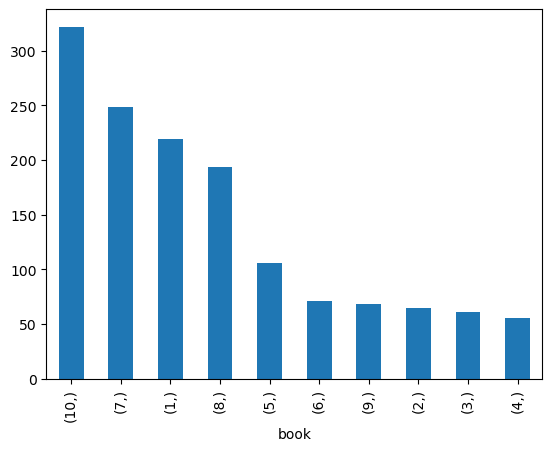

In [12]:
# for example, we may want to find all plural imperatives
df[df["morphosyntax"].apply(lambda x: x.get("mood", "") == "IMP" and x.get("number", "") == "PL")][["book"]].value_counts().plot.bar()